[*********************100%***********************]  1 of 1 completed


Mean 5-year return: 51.87%
Standard deviation of 5-year returns: 46.85%
Quantiles:
5%: -14.48%
10%: -7.86%
25%: 15.30%
50% (Median): 51.58%
75%: 78.18%
90%: 110.93%
95%: 135.41%


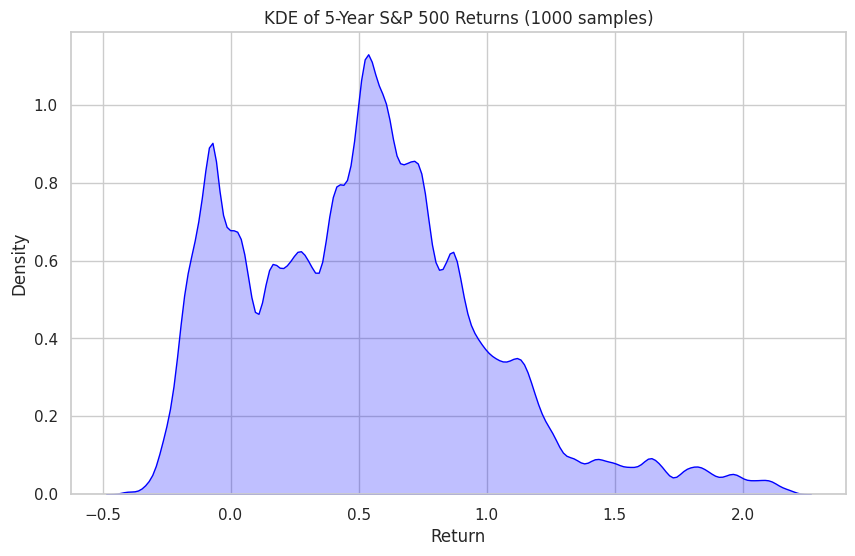

In [3]:
import yfinance as yf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Download historical S&P 500 data
ticker = '^GSPC'  # S&P 500 ticker
data = yf.download(ticker, start="1950-01-01")  # Downloading from 1950 for more coverage

# Step 2: Filter for only 'Close' prices
close_prices = data['Close']

# Step 3: Define the length of a five-year period in trading days (~252 trading days per year)
days_in_five_years = 252 * 5

# Step 4: Select 1000 random five-year periods and calculate returns
n_samples = 100000
returns = []

for _ in range(n_samples):
    # Random start point
    start_idx = np.random.randint(0, len(close_prices) - days_in_five_years)
    # Extract the prices for the five-year period
    start_price = close_prices.iloc[start_idx]
    end_price = close_prices.iloc[start_idx + days_in_five_years]
    # Calculate the return
    five_year_return = (end_price - start_price) / start_price
    returns.append(five_year_return)

# Step 5: Analyze the results (mean, standard deviation, and distribution)
returns = np.array(returns)
mean_return = np.mean(returns)
std_return = np.std(returns)

# Quantiles
quantiles = np.percentile(returns, [5, 10, 25, 50, 75, 90, 95])

# Print the results
print(f'Mean 5-year return: {mean_return:.2%}')
print(f'Standard deviation of 5-year returns: {std_return:.2%}')
print(f'Quantiles:')
print(f'5%: {quantiles[0]:.2%}')
print(f'10%: {quantiles[1]:.2%}')
print(f'25%: {quantiles[2]:.2%}')
print(f'50% (Median): {quantiles[3]:.2%}')
print(f'75%: {quantiles[4]:.2%}')
print(f'90%: {quantiles[5]:.2%}')
print(f'95%: {quantiles[6]:.2%}')

# Step 6: Plot the KDE plot of the returns distribution using seaborn
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.kdeplot(returns, fill=True, bw_adjust=0.5, color='blue')
plt.title('KDE of 5-Year S&P 500 Returns (1000 samples)')
plt.xlabel('Return')
plt.ylabel('Density')
plt.show()


[*********************100%***********************]  1 of 1 completed


Mean 5-year return: 51.68%
Standard deviation of 5-year returns: 46.69%
Quantiles:
5%: -14.41%
10%: -7.84%
25%: 15.25%
50% (Median): 51.33%
75%: 77.85%
90%: 110.78%
95%: 134.72%


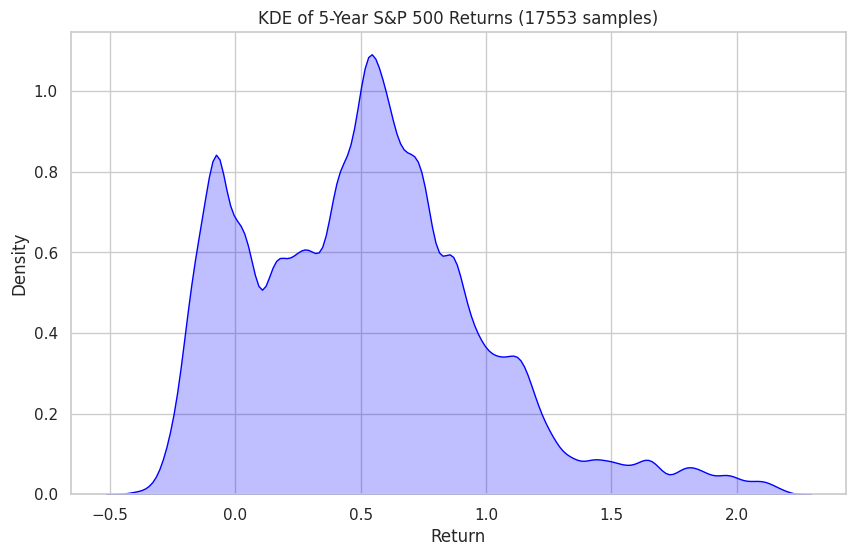

In [4]:
import yfinance as yf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Download historical S&P 500 data
ticker = '^GSPC'  # S&P 500 ticker
data = yf.download(ticker, start="1950-01-01")  # Downloading from 1950 for more coverage

# Step 2: Filter for only 'Close' prices
close_prices = data['Close']

# Step 3: Define the length of a five-year period in trading days (~252 trading days per year)
days_in_five_years = 252 * 5

# Step 4: Select 1000 random five-year periods and calculate returns
n_samples = len(close_prices) - days_in_five_years
returns = []

for i in range(n_samples):
    # Random start point
    # start_idx = np.random.randint(0, len(close_prices) - days_in_five_years)
    start_idx = i
    # Extract the prices for the five-year period
    start_price = close_prices.iloc[start_idx]
    end_price = close_prices.iloc[start_idx + days_in_five_years]
    # Calculate the return
    five_year_return = (end_price - start_price) / start_price
    returns.append(five_year_return)

# Step 5: Analyze the results (mean, standard deviation, and distribution)
returns = np.array(returns)
mean_return = np.mean(returns)
std_return = np.std(returns)

# Quantiles
quantiles = np.percentile(returns, [5, 10, 25, 50, 75, 90, 95])

# Print the results
print(f'Mean 5-year return: {mean_return:.2%}')
print(f'Standard deviation of 5-year returns: {std_return:.2%}')
print(f'Quantiles:')
print(f'5%: {quantiles[0]:.2%}')
print(f'10%: {quantiles[1]:.2%}')
print(f'25%: {quantiles[2]:.2%}')
print(f'50% (Median): {quantiles[3]:.2%}')
print(f'75%: {quantiles[4]:.2%}')
print(f'90%: {quantiles[5]:.2%}')
print(f'95%: {quantiles[6]:.2%}')

# Step 6: Plot the KDE plot of the returns distribution using seaborn
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.kdeplot(returns, fill=True, bw_adjust=0.5, color='blue')
plt.title(f'KDE of 5-Year S&P 500 Returns ({n_samples} samples)')
plt.xlabel('Return')
plt.ylabel('Density')
plt.show()


[*********************100%***********************]  1 of 1 completed


Mean 1-year return: 9.16%
Standard deviation of 1-year returns: 15.92%
Quantiles:
5%: -17.74%
10%: -12.21%
25%: -0.65%
50% (Median): 10.28%
75%: 19.71%
90%: 28.71%
95%: 33.81%


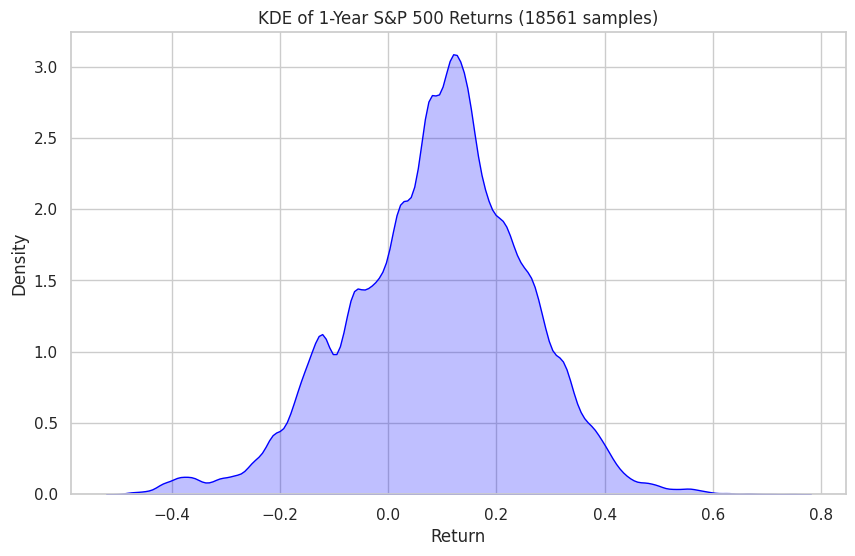

In [9]:
import yfinance as yf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Download historical S&P 500 data
ticker = '^GSPC'  # S&P 500 ticker
data = yf.download(ticker, start="1950-01-01")  # Downloading from 1950 for more coverage

# Step 2: Filter for only 'Close' prices
close_prices = data['Close']

# Step 3: Define the length of a five-year period in trading days (~252 trading days per year)
days_in_five_years = 252 * 1

# Step 4: Select 1000 random five-year periods and calculate returns
n_samples = len(close_prices) - days_in_five_years
returns = []

for i in range(n_samples):
    # Random start point
    # start_idx = np.random.randint(0, len(close_prices) - days_in_five_years)
    start_idx = i
    # Extract the prices for the five-year period
    start_price = close_prices.iloc[start_idx]
    end_price = close_prices.iloc[start_idx + days_in_five_years]
    # Calculate the return
    five_year_return = (end_price - start_price) / start_price
    returns.append(five_year_return)

# Step 5: Analyze the results (mean, standard deviation, and distribution)
returns = np.array(returns)
# returns = (1+returns)**5-1
mean_return = np.mean(returns)
std_return = np.std(returns)

# Quantiles
quantiles = np.percentile(returns, [5, 10, 25, 50, 75, 90, 95])

# Print the results
print(f'Mean 1-year return: {mean_return:.2%}')
print(f'Standard deviation of 1-year returns: {std_return:.2%}')
print(f'Quantiles:')
print(f'5%: {quantiles[0]:.2%}')
print(f'10%: {quantiles[1]:.2%}')
print(f'25%: {quantiles[2]:.2%}')
print(f'50% (Median): {quantiles[3]:.2%}')
print(f'75%: {quantiles[4]:.2%}')
print(f'90%: {quantiles[5]:.2%}')
print(f'95%: {quantiles[6]:.2%}')

# Step 6: Plot the KDE plot of the returns distribution using seaborn
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.kdeplot(returns, fill=True, bw_adjust=0.5, color='blue')
plt.title(f'KDE of 1-Year S&P 500 Returns ({n_samples} samples)')
plt.xlabel('Return')
plt.ylabel('Density')
plt.show()

[*********************100%***********************]  1 of 1 completed


Mean 1-day return: 0.04%
Standard deviation of 1-day returns: 0.99%
Quantiles:
5%: -1.47%
10%: -1.00%
25%: -0.41%
50% (Median): 0.05%
75%: 0.51%
90%: 1.05%
95%: 1.47%


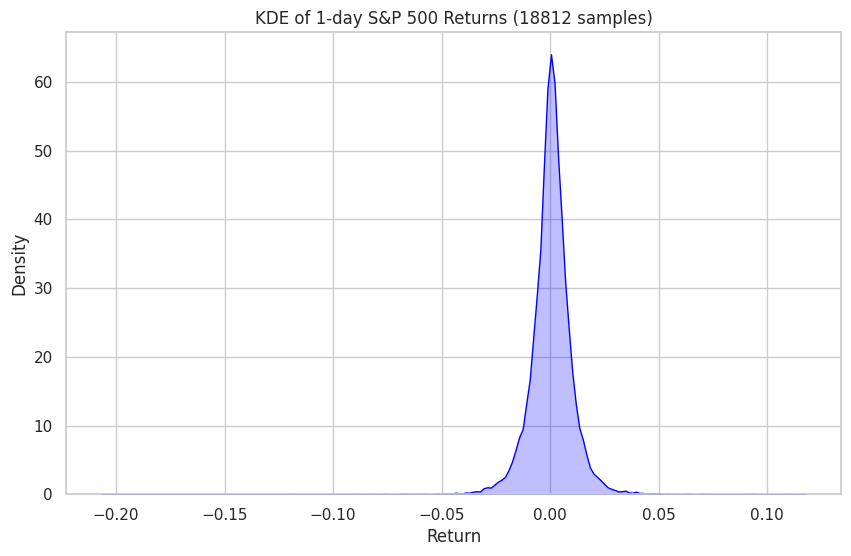

In [10]:
import yfinance as yf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Download historical S&P 500 data
ticker = '^GSPC'  # S&P 500 ticker
data = yf.download(ticker, start="1950-01-01")  # Downloading from 1950 for more coverage

# Step 2: Filter for only 'Close' prices
close_prices = data['Close']

# Step 3: Define the length of a five-year period in trading days (~252 trading days per year)
days_in_five_years = 1

# Step 4: Select 1000 random five-year periods and calculate returns
n_samples = len(close_prices) - days_in_five_years
returns = []

for i in range(n_samples):
    # Random start point
    # start_idx = np.random.randint(0, len(close_prices) - days_in_five_years)
    start_idx = i
    # Extract the prices for the five-year period
    start_price = close_prices.iloc[start_idx]
    end_price = close_prices.iloc[start_idx + days_in_five_years]
    # Calculate the return
    five_year_return = (end_price - start_price) / start_price
    returns.append(five_year_return)

# Step 5: Analyze the results (mean, standard deviation, and distribution)
returns = np.array(returns)
# returns = (1+returns)**5-1
mean_return = np.mean(returns)
std_return = np.std(returns)

# Quantiles
quantiles = np.percentile(returns, [5, 10, 25, 50, 75, 90, 95])

# Print the results
print(f'Mean 1-day return: {mean_return:.2%}')
print(f'Standard deviation of 1-day returns: {std_return:.2%}')
print(f'Quantiles:')
print(f'5%: {quantiles[0]:.2%}')
print(f'10%: {quantiles[1]:.2%}')
print(f'25%: {quantiles[2]:.2%}')
print(f'50% (Median): {quantiles[3]:.2%}')
print(f'75%: {quantiles[4]:.2%}')
print(f'90%: {quantiles[5]:.2%}')
print(f'95%: {quantiles[6]:.2%}')

# Step 6: Plot the KDE plot of the returns distribution using seaborn
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.kdeplot(returns, fill=True, bw_adjust=0.5, color='blue')
plt.title(f'KDE of 1-day S&P 500 Returns ({n_samples} samples)')
plt.xlabel('Return')
plt.ylabel('Density')
plt.show()